<a href="https://colab.research.google.com/github/Awangnugrawan/Classification-text-messange-with-LSTM/blob/main/Classification_text_messange_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUBMISSION PROJECT DICODING "Belajar Pengembangan Machine Learning"
## DATA DIRI

*  Nama= Awang Mulya Nugrawan
*  username DICODING= awang_nugrawan
*  email = awangmulyanugrawan@gmail.com
*  No.hp = 082191862002
*  Asal= Makassar, Sulawesi Selatan
*  Status = Mahasiswa Sisfor Universitas Hasanuddin











# LIBRARY

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout
import matplotlib.pyplot as plt
import numpy as np

#Dataset 

In [24]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Machine learning/SPAM text message 20170820 - Data.csv')


In [25]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [26]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#ENCODING

In [27]:
df.Category.replace('ham' , 1 ,inplace = True)
df.Category.replace('spam' , 0 ,inplace = True)

In [28]:
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [29]:
import re
#hapus tanda baca
df["Message"] = df["Message"].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [30]:
df

,Category,Message
0,1,Go until jurong point crazy Available only in ...
1,1,Ok lar Joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor U c already then say
4,1,Nah I dont think he goes to usf he lives aroun...
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home
5569,1,Pity was in mood for that Soany other suggest...
5570,1,The guy did some bitching but I acted like id ...


In [31]:
#detelete stopwards
from gensim.parsing.preprocessing import remove_stopwords
df["Message"] = df["Message"].apply(lambda x: remove_stopwords(x))

In [32]:
df

,Category,Message
0,1,Go jurong point crazy Available bugis n great ...
1,1,Ok lar Joking wif u oni
2,0,Free entry 2 wkly comp win FA Cup final tkts 2...
3,1,U dun early hor U c
4,1,Nah I dont think goes usf lives
...,...,...
5567,0,This 2nd time tried 2 contact u U won 750 Poun...
5568,1,Will ü b going esplanade fr home
5569,1,Pity mood Soany suggestions
5570,1,The guy bitching I acted like id interested bu...


#Split dataset and Tokenization

In [33]:
X_train, X_test,y_train,y_test = train_test_split(df['Message'],df['Category'],test_size=0.2,random_state=42)

In [34]:
tokenizer = Tokenizer(num_words=1200, oov_token='-')
tokenizer.fit_on_texts(X_train) #hanya digunakan untuk data training saja untuk menghindari kemungkinan terjadinya overfitting
 
sekuens_latih = tokenizer.texts_to_sequences(X_train)
sekuens_test = tokenizer.texts_to_sequences(X_test)
 
padded_latih = pad_sequences(sekuens_latih,maxlen=100,padding ='post', truncating='post') 
padded_test = pad_sequences(sekuens_test,maxlen=100,padding ='post', truncating='post')

#Membangun arsitektur model

In [35]:
model = tf.keras.Sequential([
    Embedding(1200, 20, input_length=100),
    LSTM(100, return_sequences=True),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


#Compile dan latih model dengan model.compile dan model.fit hingga mendapatkan akurasi yang diinginkan.

In [36]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
#IMPLEMENTASI CALLBACK
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [38]:
hist = model.fit(
    padded_latih, y_train, 
    validation_data=(padded_test, y_test),
    steps_per_epoch=32,  # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=15,
    validation_steps=8,  # berapa batch yang akan dieksekusi pada setiap epoch   
    batch_size=128,
    callbacks=[callbacks], #implementasi callback
    validation_split=0.2, 
    verbose=1)

Epoch 1/15
32/32 [==============================] - 14s 346ms/step - loss: 0.5027 - accuracy: 0.8547 - val_loss: 0.3814 - val_accuracy: 0.8730
Epoch 2/15
32/32 [==============================] - 10s 327ms/step - loss: 0.3926 - accuracy: 0.8689 - val_loss: 0.3631 - val_accuracy: 0.8730
Epoch 3/15
32/32 [==============================] - 10s 327ms/step - loss: 0.2550 - accuracy: 0.9090 - val_loss: 0.1455 - val_accuracy: 0.9598
Epoch 4/15
32/32 [==============================] - ETA: 0s - loss: 0.1327 - accuracy: 0.9624
Akurasi telah mencapai >95%!
32/32 [==============================] - 10s 322ms/step - loss: 0.1327 - accuracy: 0.9624 - val_loss: 0.1294 - val_accuracy: 0.9618


# Plot loss dan akurasi pada saat training dan validation.

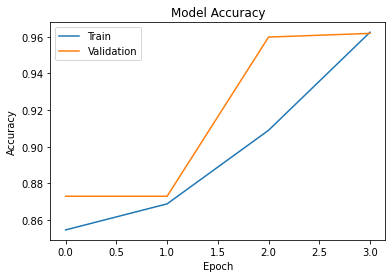

In [39]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

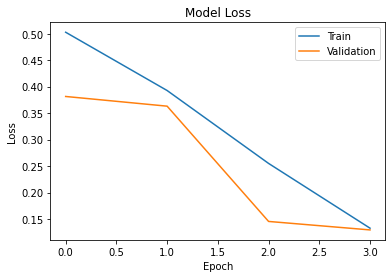

In [40]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()